## The Global Structure of Networks


In [1]:
from networkx.algorithms import bipartite
from networkx import NetworkXError
import networkx as nx
from pathlib import Path

G_karate = nx.karate_club_graph()
mr_hi = 0
john_a = 33

# load the German electrical grid dataset
data_dir = "../data/mureddu2016/0.2/branches.csv"
with open(data_dir) as f:
    # skip header
    next(f)
    # read edgelist format
    G_electric = nx.read_edgelist(
        f,
        delimiter="\t",
        create_using=nx.Graph,
        data=[("X", float), ("Pmax", float)]
    )


# telecommunication network. The European GEANT network
data_dir = "../data/UAITZ/Geant2012.graphml"
G_internet = nx.read_graphml(data_dir)

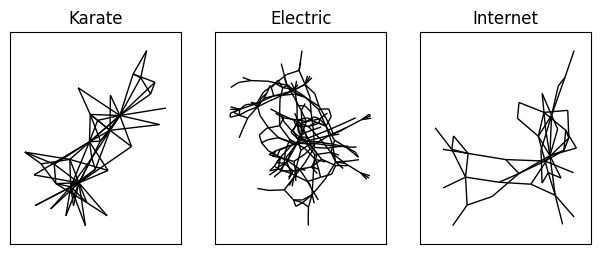

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(7.5, 2.75))
plt.subplot(1,3,1)
plt.title("Karate")
nx.draw_networkx(G_karate, node_size=0, with_labels=False)

plt.subplot(1,3,2)
plt.title("Electric")
nx.draw_networkx(G_electric, node_size=0, with_labels=False)

plt.subplot(1,3,3)
plt.title("Internet")
nx.draw_networkx(G_internet, node_size=0, with_labels=False)

## Diameter and mean shortest path


In [3]:
# find shortest paths
list(nx.all_shortest_paths(G_karate, mr_hi, john_a))

[[0, 8, 33], [0, 13, 33], [0, 19, 33], [0, 31, 33]]

In [4]:
nx.diameter(G_karate)

5

## Global Clustering
The level of clustering or transitivity in a network can be quantified using triangles, just as the transitivity was quantified for individual nodes. These measures describe, overall, how common triangles are within a network
The simplest measure of large-scale clustering is **transitivity** - The fraction of possible triangles that are present

In [5]:
nx.transitivity(G_karate)

0.2556818181818182

## Measuring Resilience
Resilience is the ability of a system to withstand errors and attacks. In an electrical grid, for example, resilience would mean keeping power flowing when a transmission line or generator broke down. In traffic, it could mean the ability to reroute cars when a street is closed due to an accident.
This is a fundamental network propertu because it can be achieved with redundant paths. 
The simplest (and crudest) measure of resileince is the density of a network: the fraction of possible edges that exist. 

In [6]:
nx.density(G_karate)

0.13903743315508021

## Minimum Cuts
This is the number of nodes(or edges) that need to be removed to separate the network into two unconnecyted parts

In [7]:
import networkx.algorithms.connectivity as nxcon
nxcon.minimum_st_node_cut(G_karate, mr_hi, john_a)

{2, 8, 13, 19, 30, 31}

In [8]:
nxcon.minimum_st_edge_cut(G_karate, mr_hi, john_a)

{(0, 8),
 (0, 31),
 (1, 30),
 (2, 8),
 (2, 27),
 (2, 28),
 (2, 32),
 (9, 33),
 (13, 33),
 (19, 33)}